In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import cv2
import tarfile
import os, glob
import random
import matplotlib.pyplot as plt

## Import data set

In [9]:
dataset_path = '../data/CNR-Park_EXT_yolov8-2/train/images'

## Get a random image 

In [10]:
# Get a list of all files in the folder
all_files = os.listdir(dataset_path)

# Filter only .jpg files
jpg_files = [file for file in all_files if file.lower().endswith(".jpg")]

# Select a random .jpg file
random_image = random.choice(jpg_files)

# image
path_to_image = os.path.join(dataset_path,random_image)

## View the image

In [11]:
def show_image(image, title = 'Title'):
    plt.figure(figsize=(10,8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

Image dimension: (750, 1000, 3)


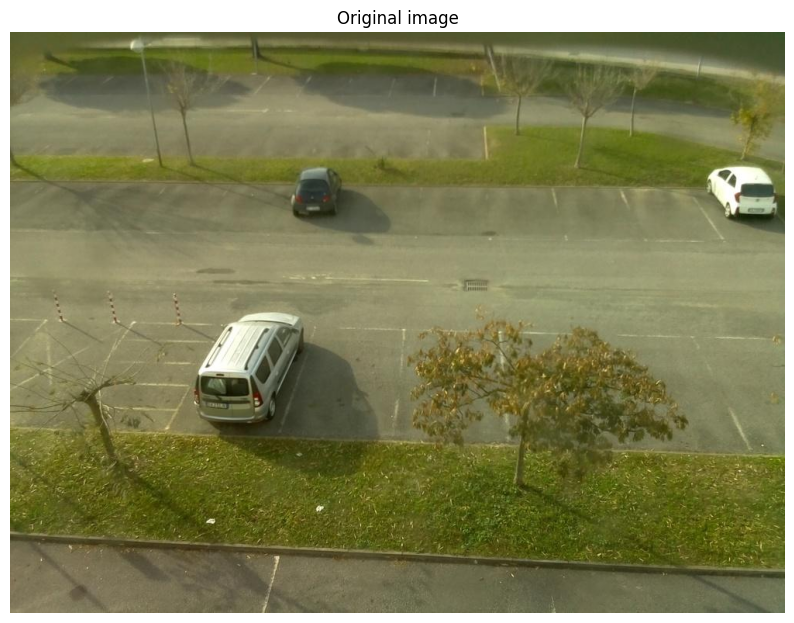

In [12]:
# Read the image with opencv
imgocv = cv2.cvtColor(cv2.imread(path_to_image), cv2.COLOR_BGR2RGB)
print(f'Image dimension: {imgocv.shape}')
show_image(imgocv, title='Original image')

# Edge Detection

## 1) Canny Edge detection

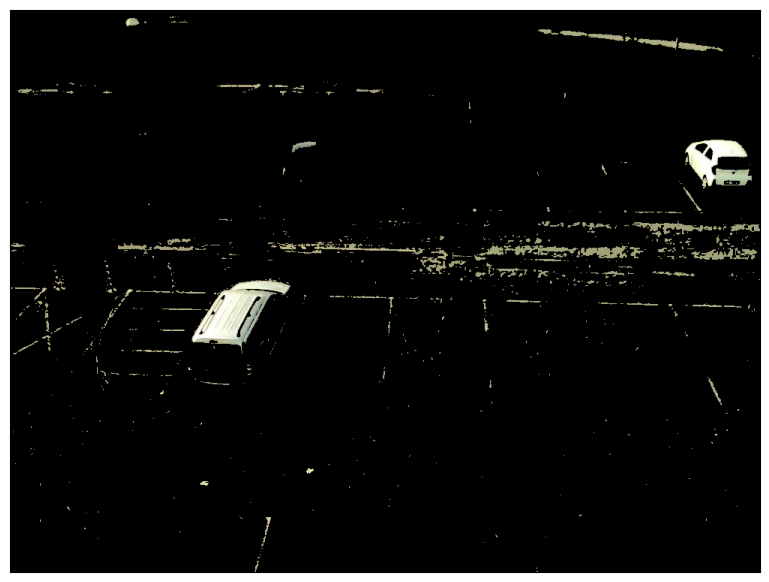

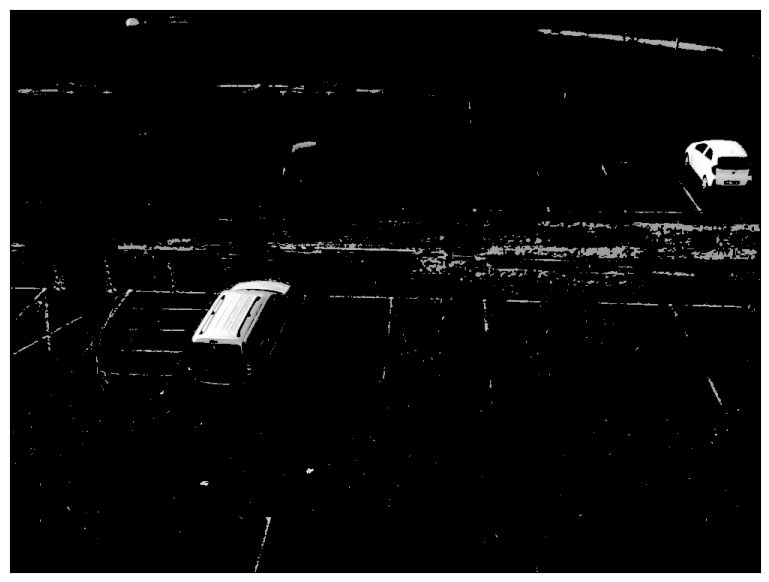

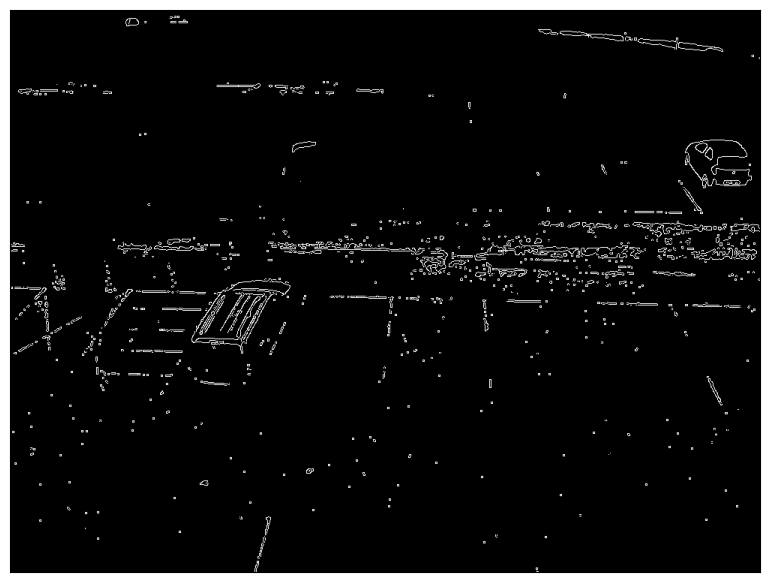

In [14]:
from __future__ import division

cwd = os.getcwd()

def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(15, 12))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

test_images = [plt.imread(path_to_image)]

#show_images(test_images)

#rgb2gray
def select_rgb_white_yellow(image): 
    lower = np.uint8([120, 120, 120])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower, upper)
    lower = np.uint8([190, 190,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, lower, upper)
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked = cv2.bitwise_and(image, image, mask = mask)
    return masked

white_yellow_images = list(map(select_rgb_white_yellow, test_images))
show_images(white_yellow_images)

def convert_gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gray_images = list(map(convert_gray_scale, white_yellow_images))

show_images(gray_images)

#canny
def detect_edges(image, low_threshold=50, high_threshold=200):
    return cv2.Canny(image, low_threshold, high_threshold)

edge_images = list(map(lambda image: detect_edges(image), gray_images))

show_images(edge_images)